In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from operator import truediv

def predict(y,level):
    x = np.linspace(0, 49, num=49)
    x2 = np.linspace(0, 51, num=51)
    poly = PolynomialFeatures(level, include_bias=False)
    poly.fit_transform(x[:, None])
    poly_model = make_pipeline(PolynomialFeatures(level),
                               LinearRegression())
    poly_model.fit(x[:, np.newaxis], y)
    y_predicted = poly_model.predict(x2[:, np.newaxis])
    return y_predicted

def predict_from_country(y_predicted,y,x,level):
    poly = PolynomialFeatures(level, include_bias=False)
    poly.fit_transform(x[:, None])
    poly_model = make_pipeline(PolynomialFeatures(level),
                               LinearRegression())
    poly_model.fit(x[:, np.newaxis], y)
    return poly_model.predict(y_predicted[:, np.newaxis])
    
def distortion(y,y_predicted):
    mean = np.mean(y)
    max_value = max(y)
    error = sum(pow(y_predicted[:49]-y, 2))
    return (error/mean)/(math.log10(max_value))

/Users/ziedbk/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/ziedbk/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/ziedbk/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

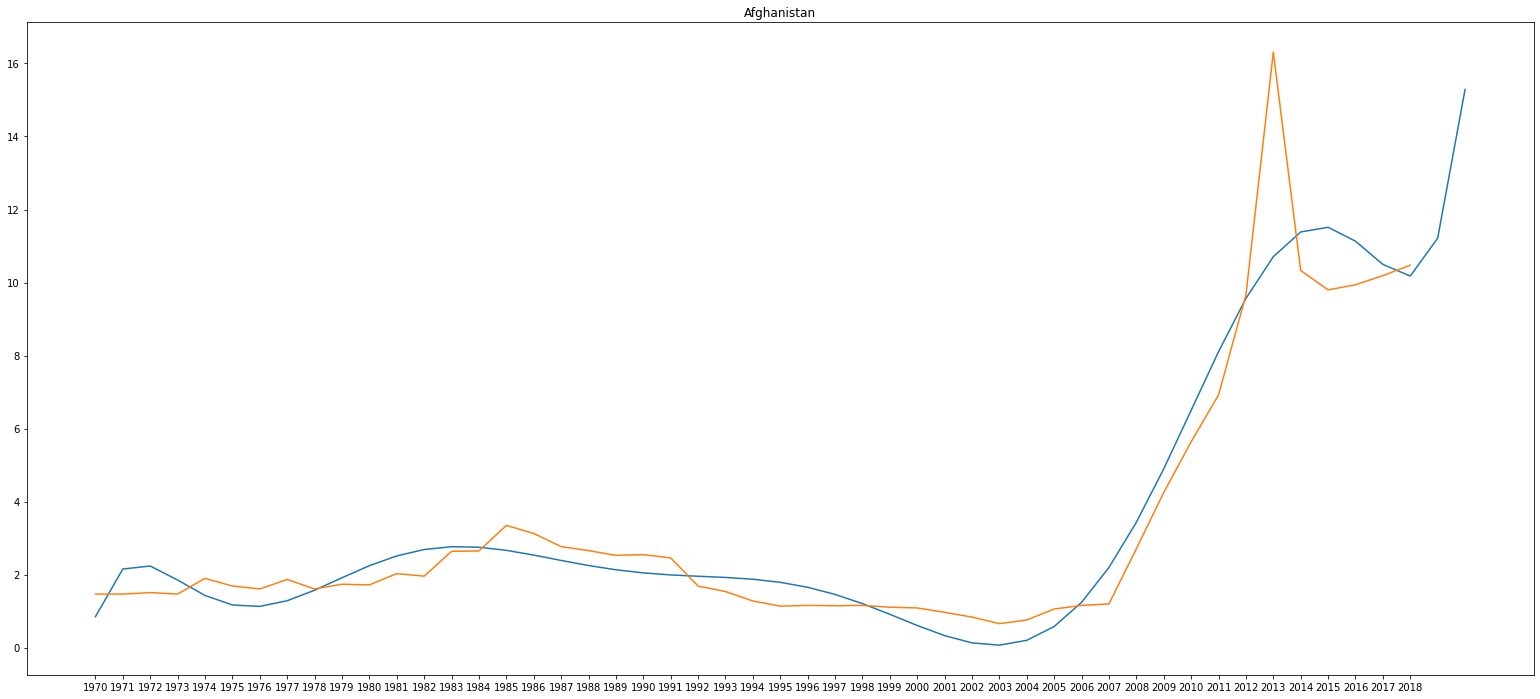

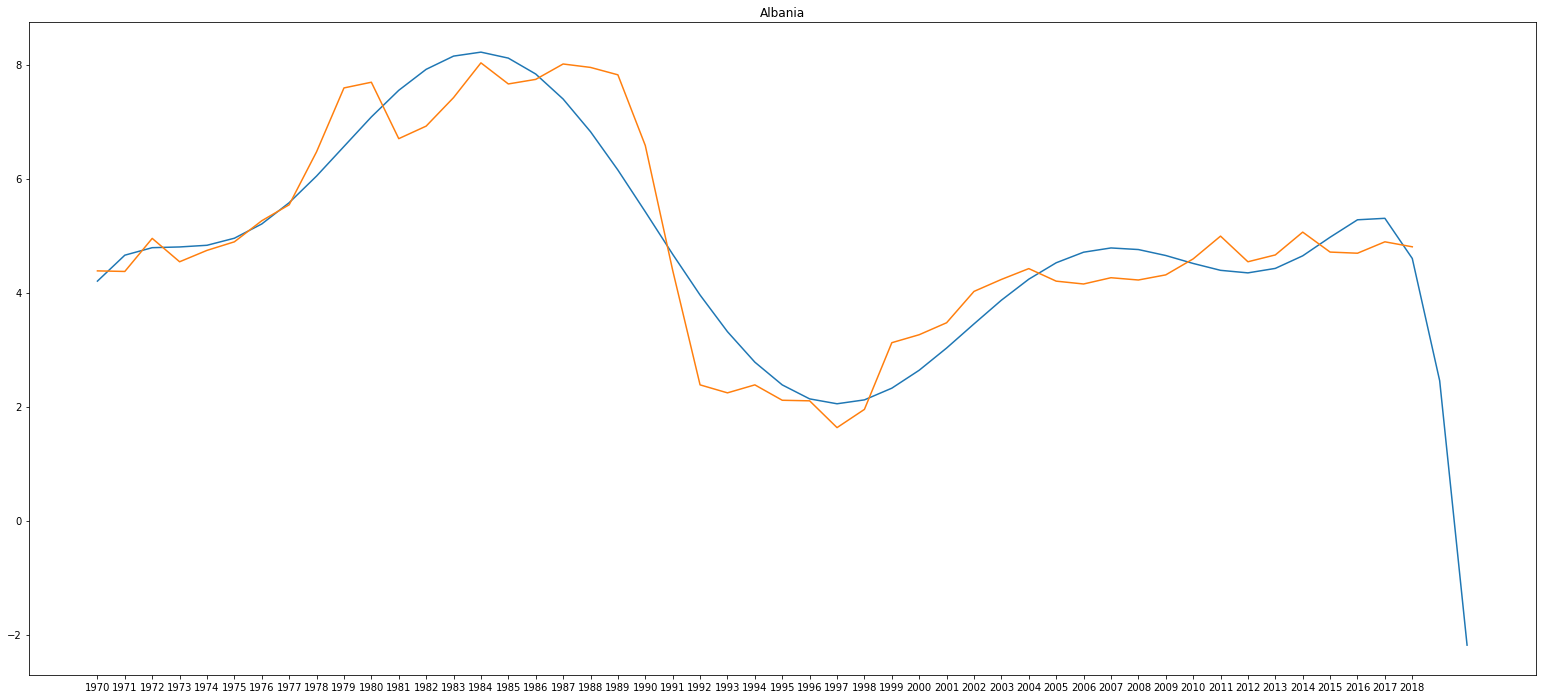

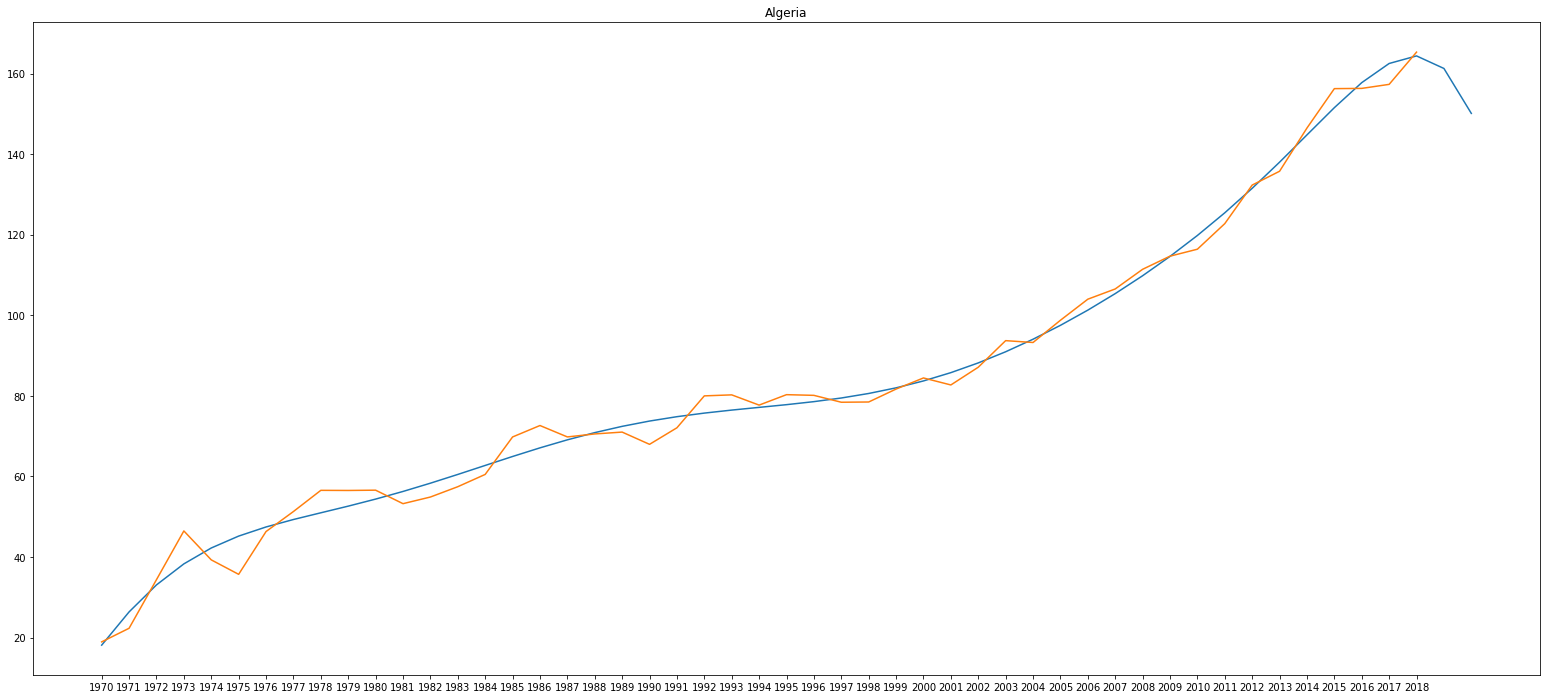

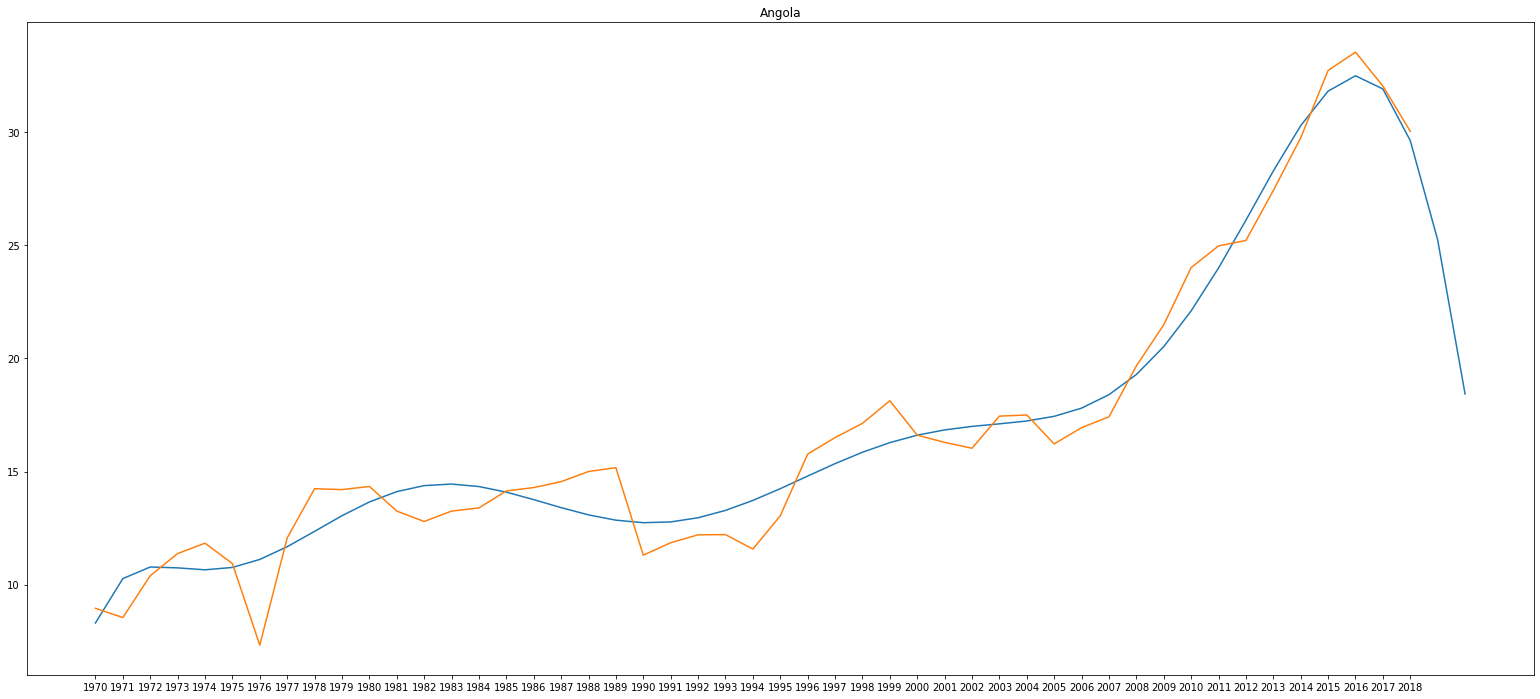

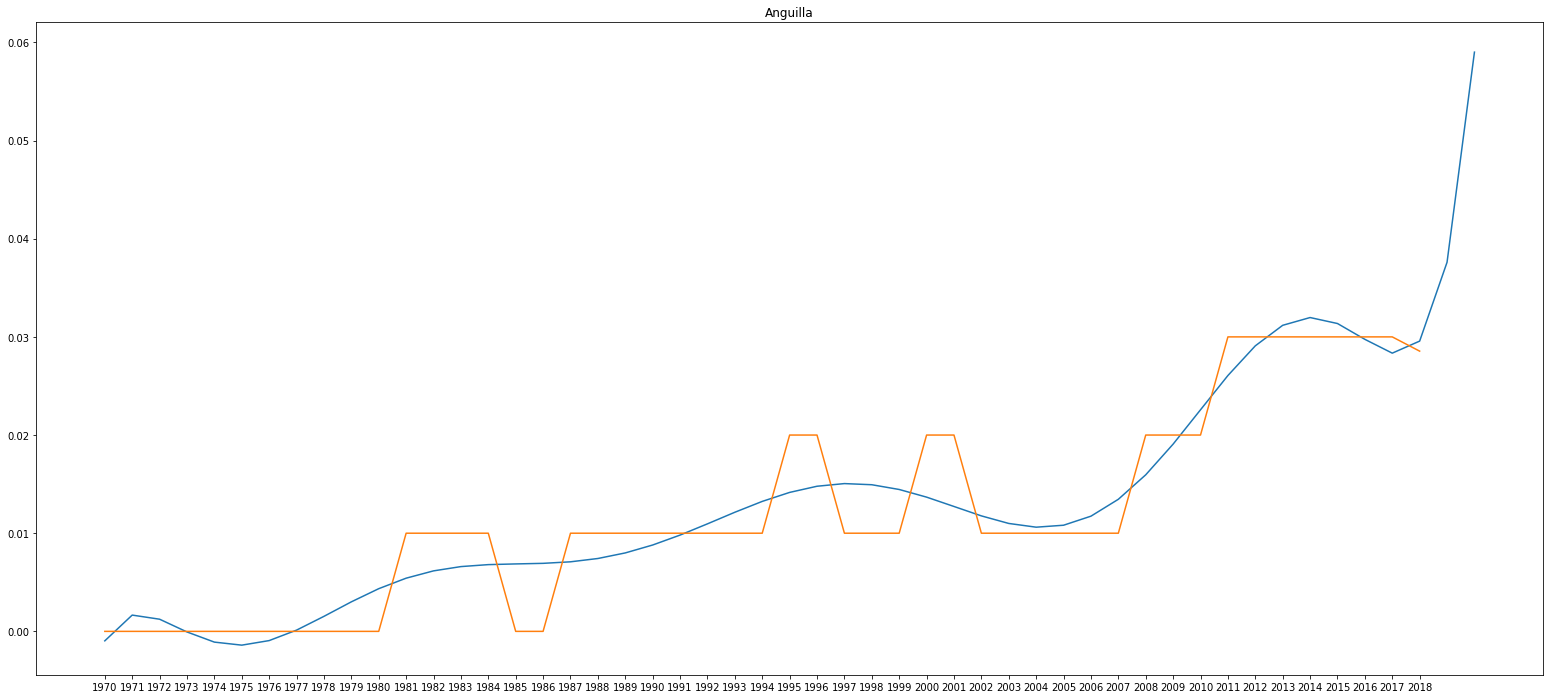

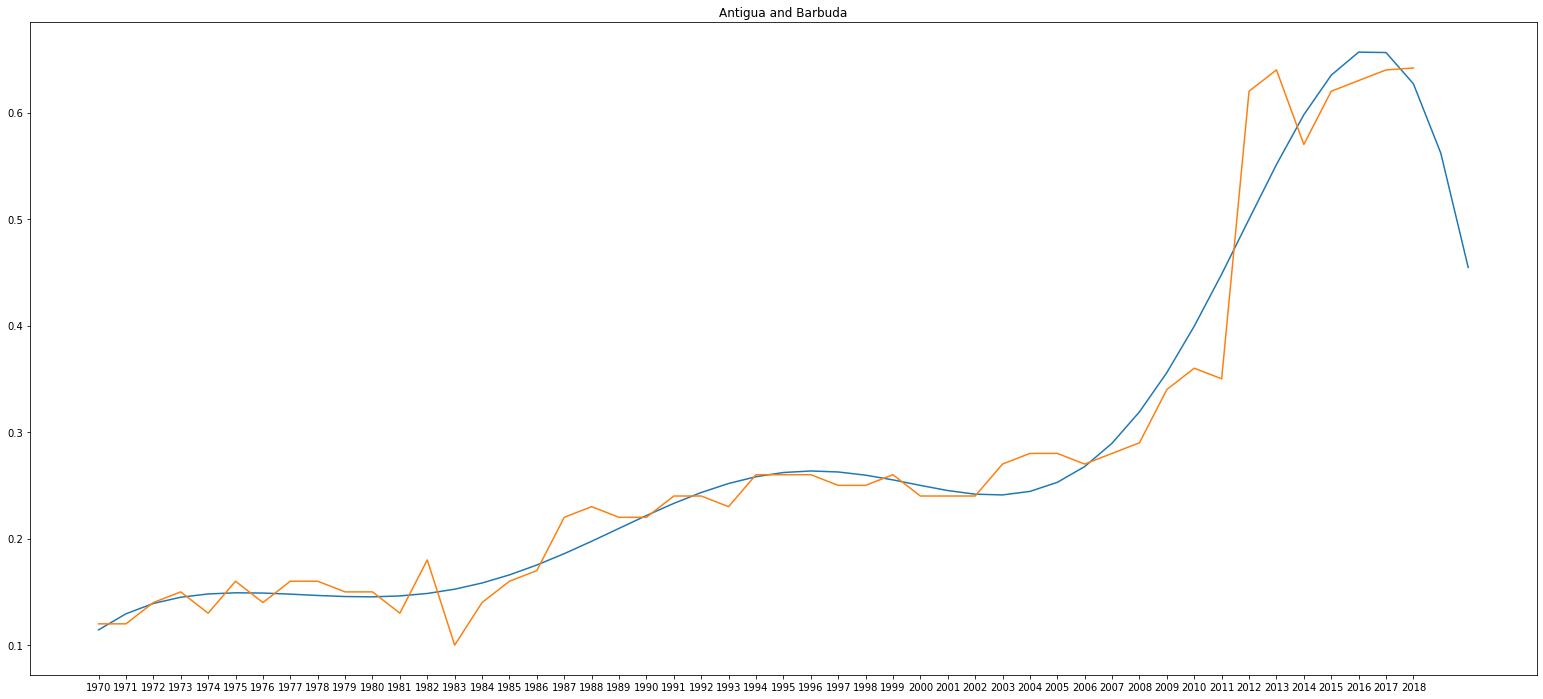

Error in callback <function flush_figures at 0x113e0dea0> (for post_execute):


KeyboardInterrupt: 

In [2]:
path = "/Users/ziedbk/Desktop/group01/datasets"
df_CO2 = pd.read_csv(path+'/greenhouse/co2_country_edgar.csv')

data_co2 =[None] * 213
y_predicted =[None] * 213
x = np.linspace(0, 49, num=49)
x2 = np.linspace(0, 51, num=51)
for i in range (np.size(df_CO2['country_name'])):
    data_co2[i] = df_CO2.loc[df_CO2['country_name'] == df_CO2['country_name'][i]]

for i in range (np.size(df_CO2['country_name'])-3): # delete 3 last lines from the array to limit the plots
    y = (data_co2[i].iloc[0][1:].str.replace(',', '.', regex=True).astype(float)) # strings to floats
    name = (data_co2[i].iloc[0][0])
    predicted = predict(y,9)
    error = distortion(y, predicted)
    y_predicted[i] = np.append(np.append(name, predicted), error)
    if (error < 100):
        fig = plt.figure(figsize=(27, 12))
        plt.plot(predicted)
        plt.plot(y)
        plt.title(data_co2[i].iloc[0][0])

## the best predictions are found for:
Australia,
Bangladesh,
Burkina Faso,
Central Africa Republic,
Egypt,
Finland,
Iceland,
India,
Indonesia,
Malaysia,
Mauritus,
Morocco,
Philippines,
Qatar,
Sweden,
Turkey,
United Arab Emirates,
Vietnam,
Greece,
Noth Korea.

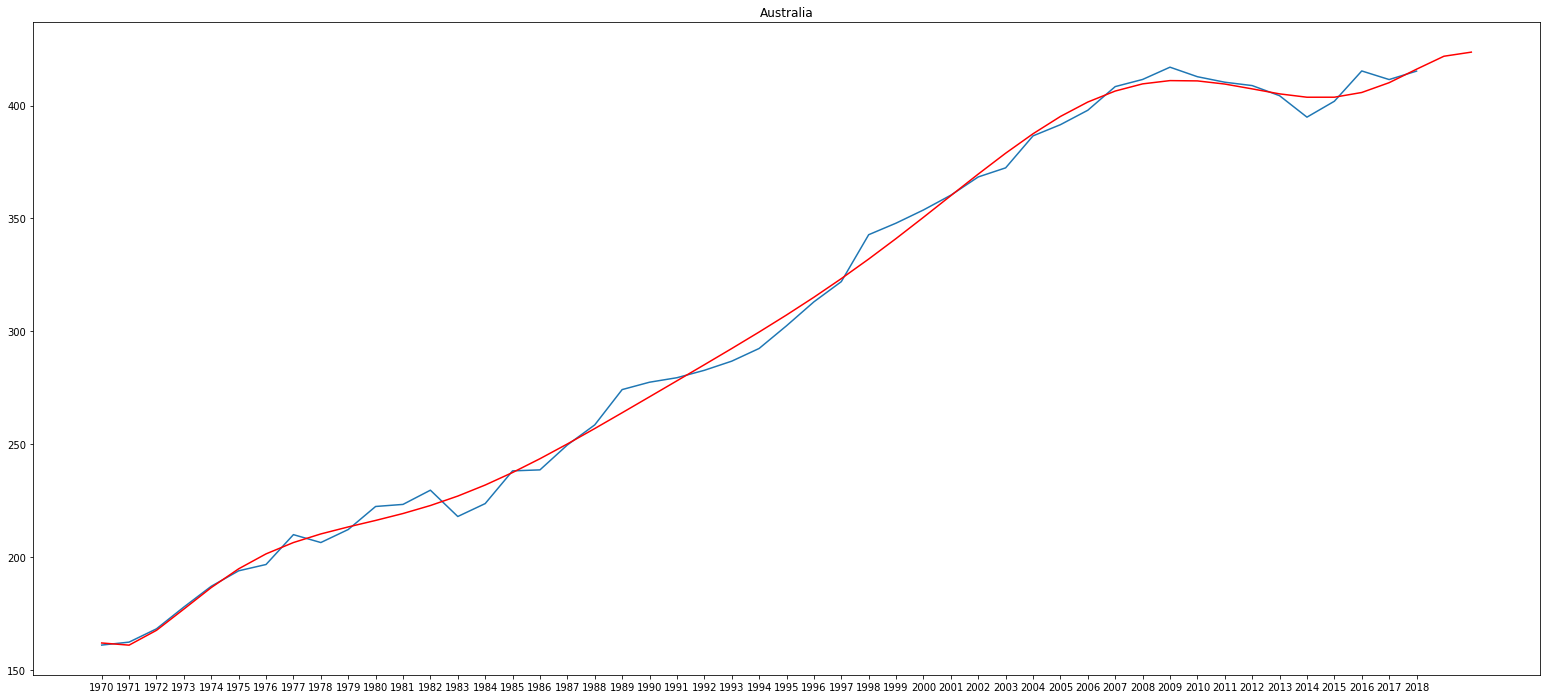

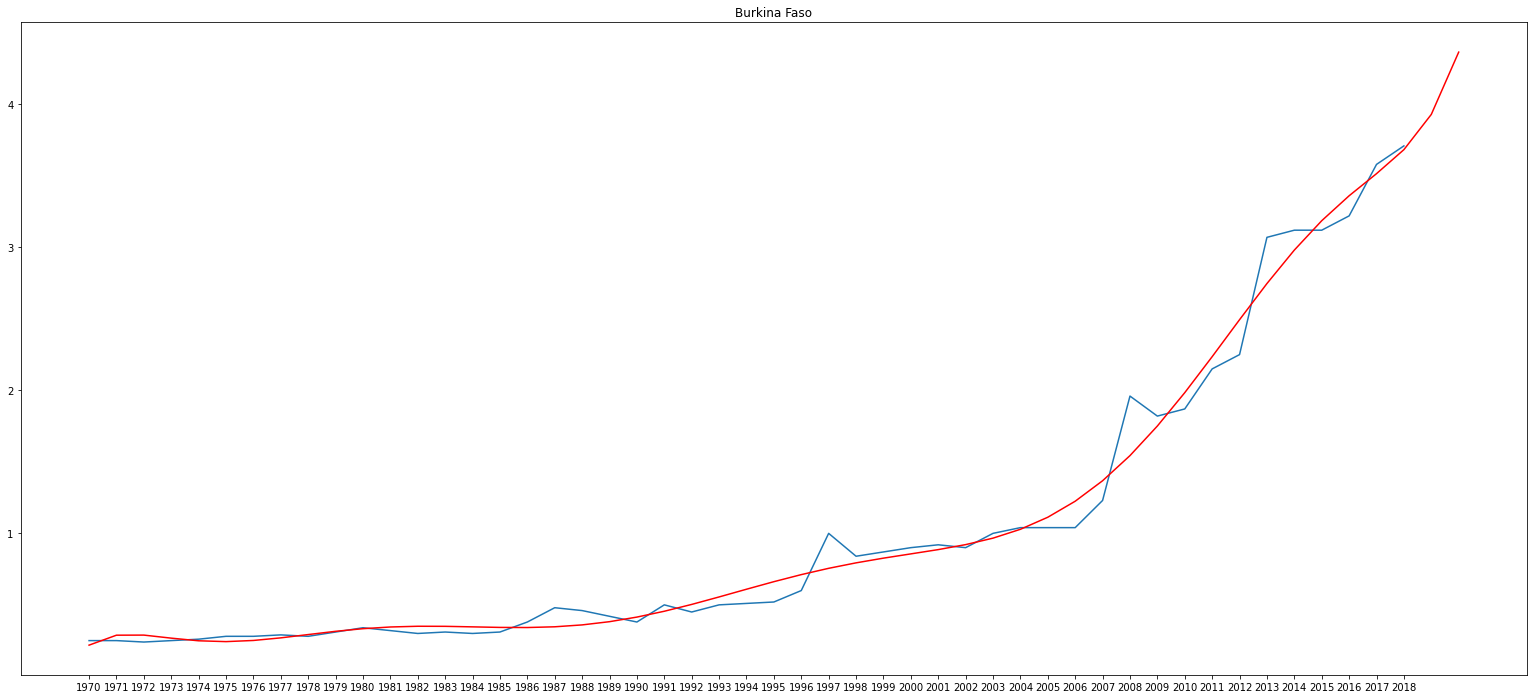

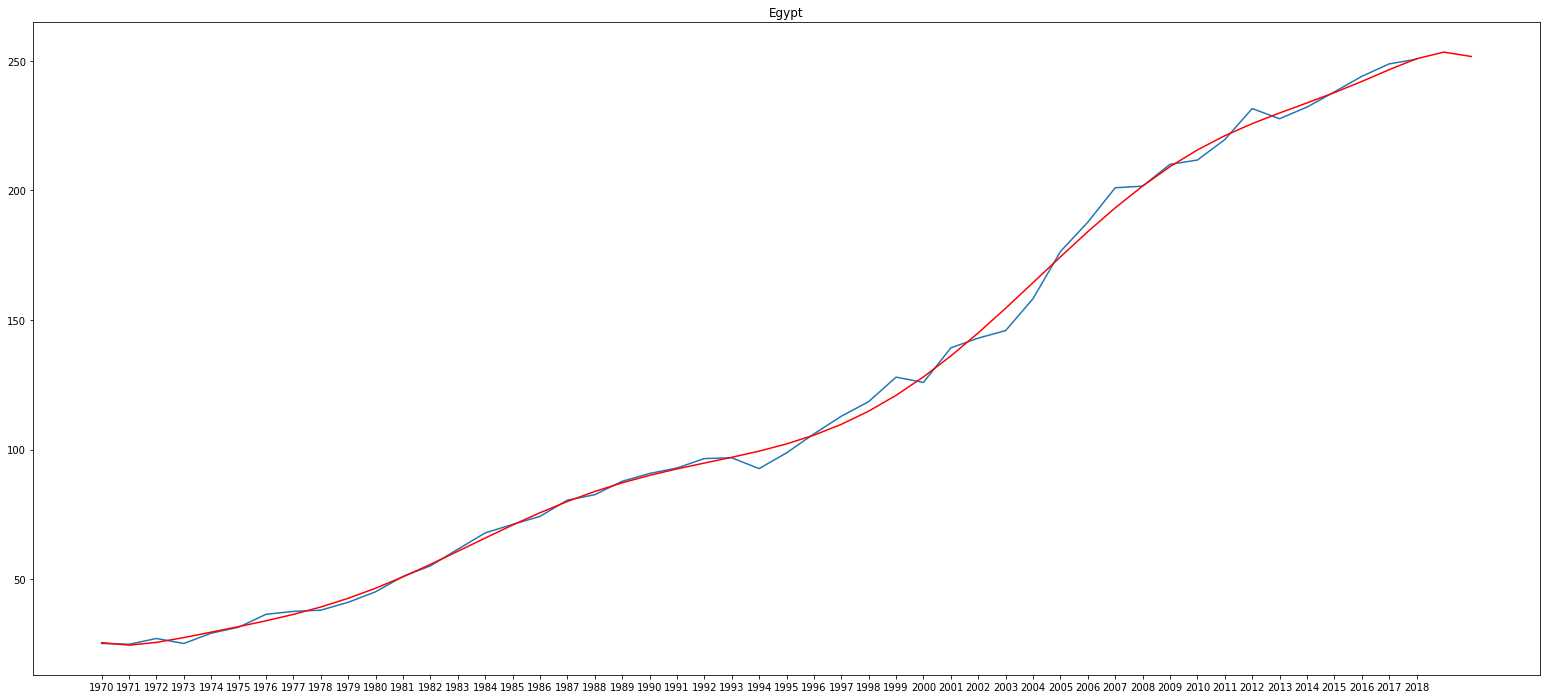

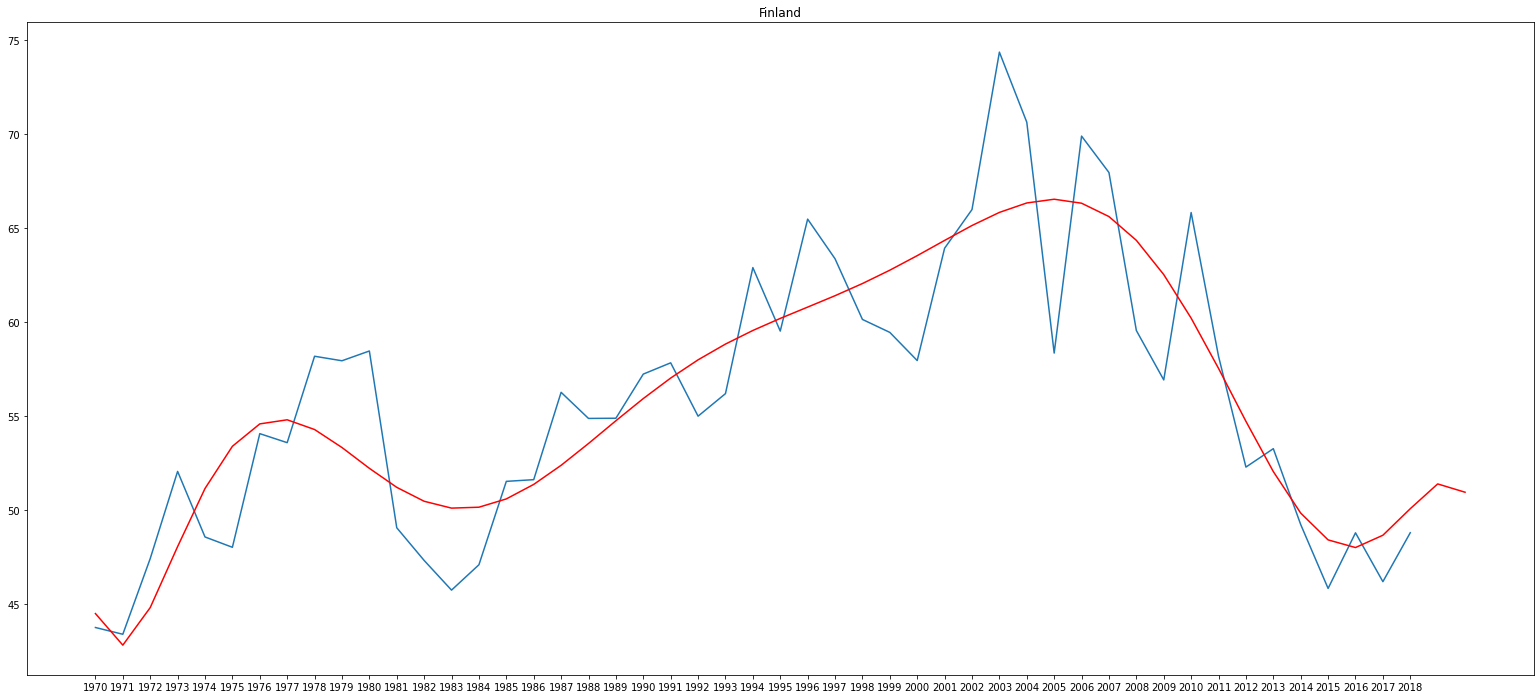

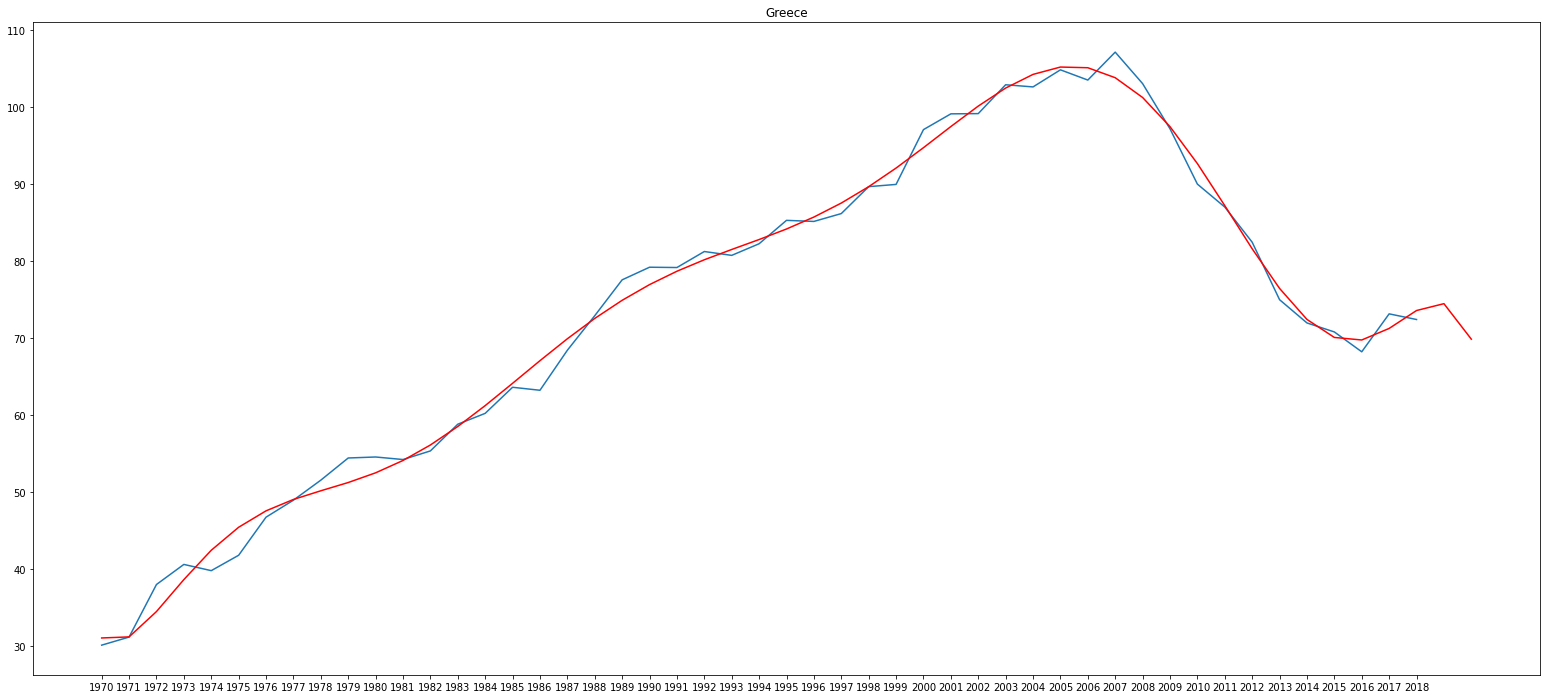

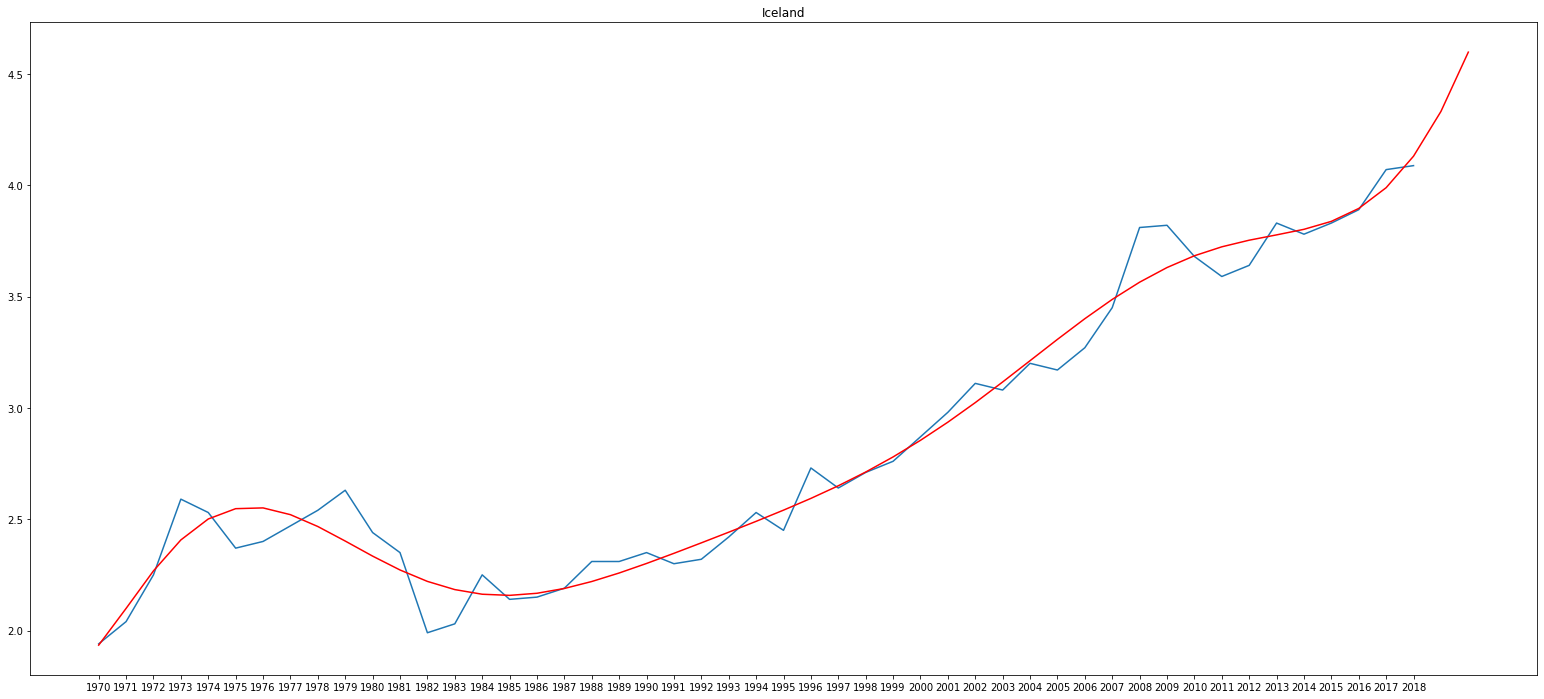

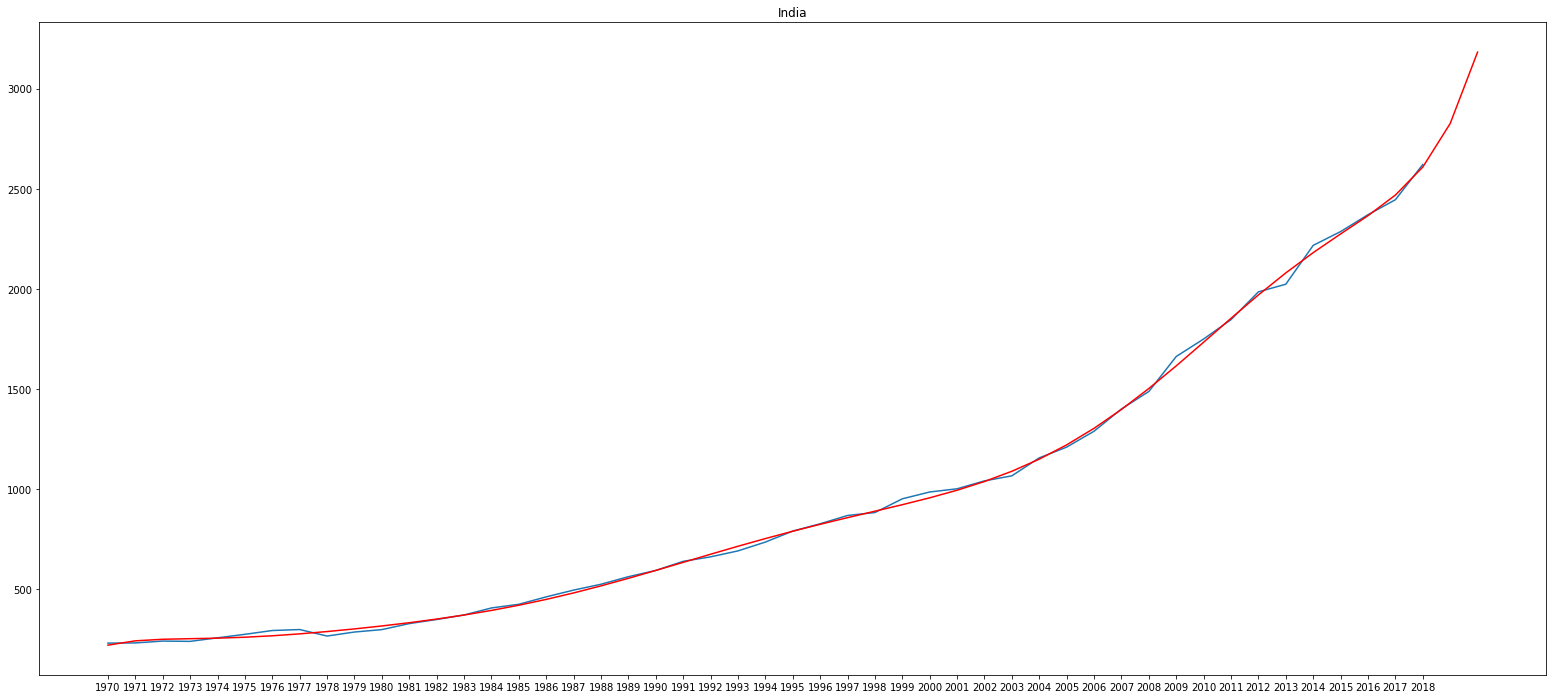

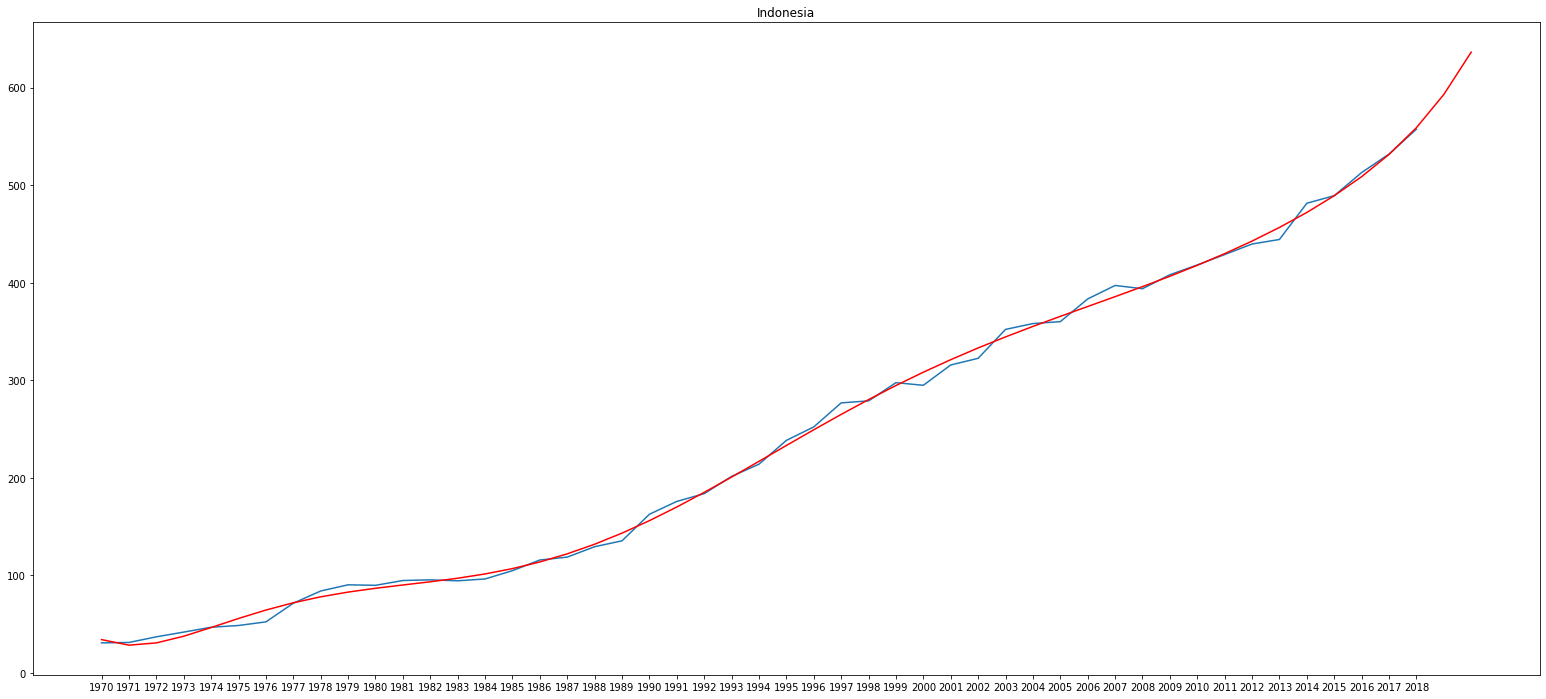

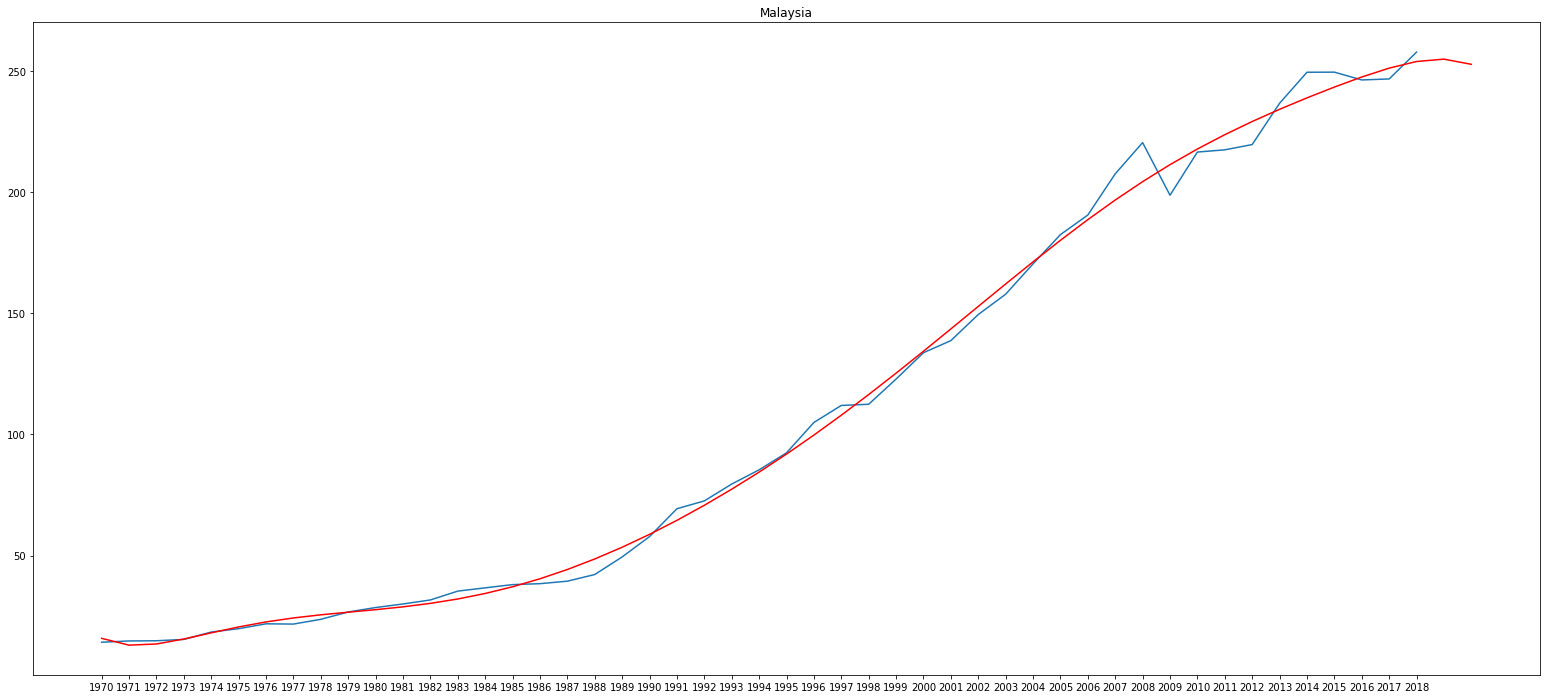

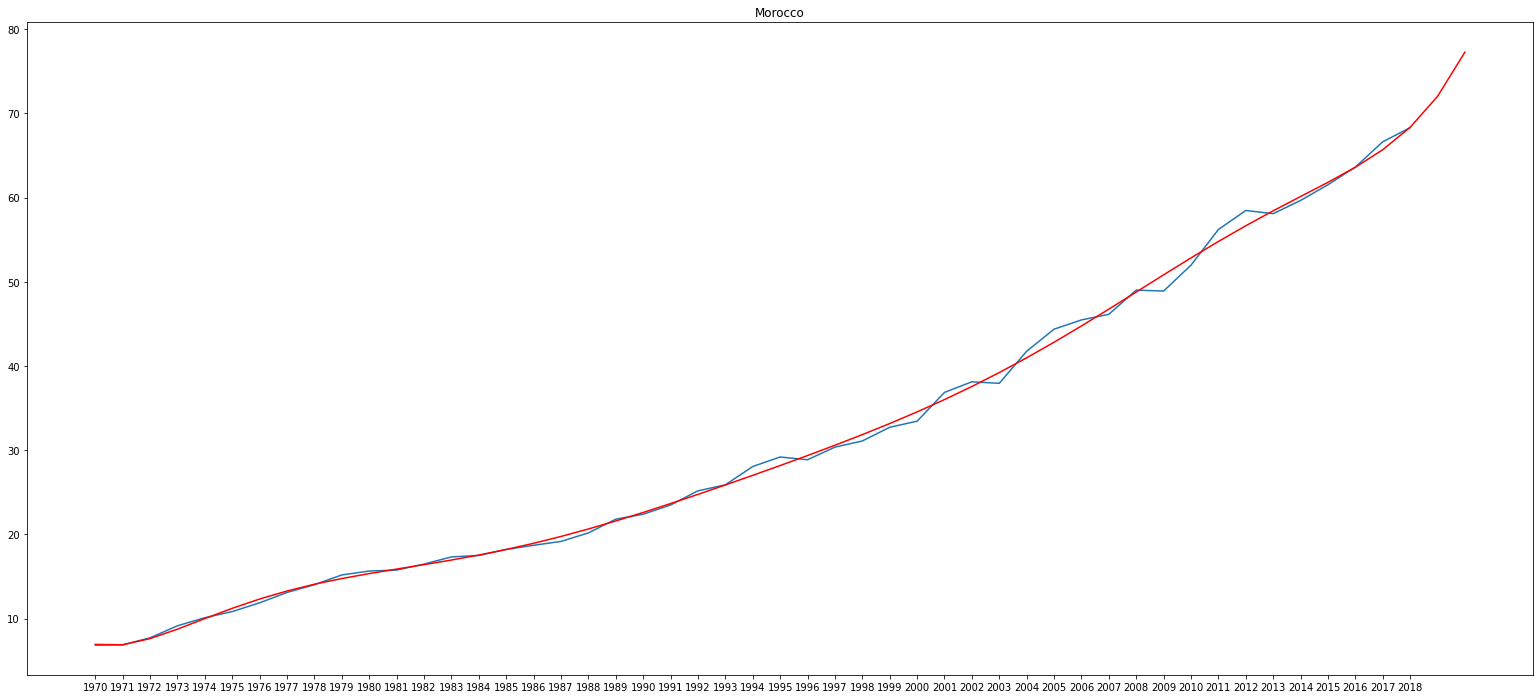

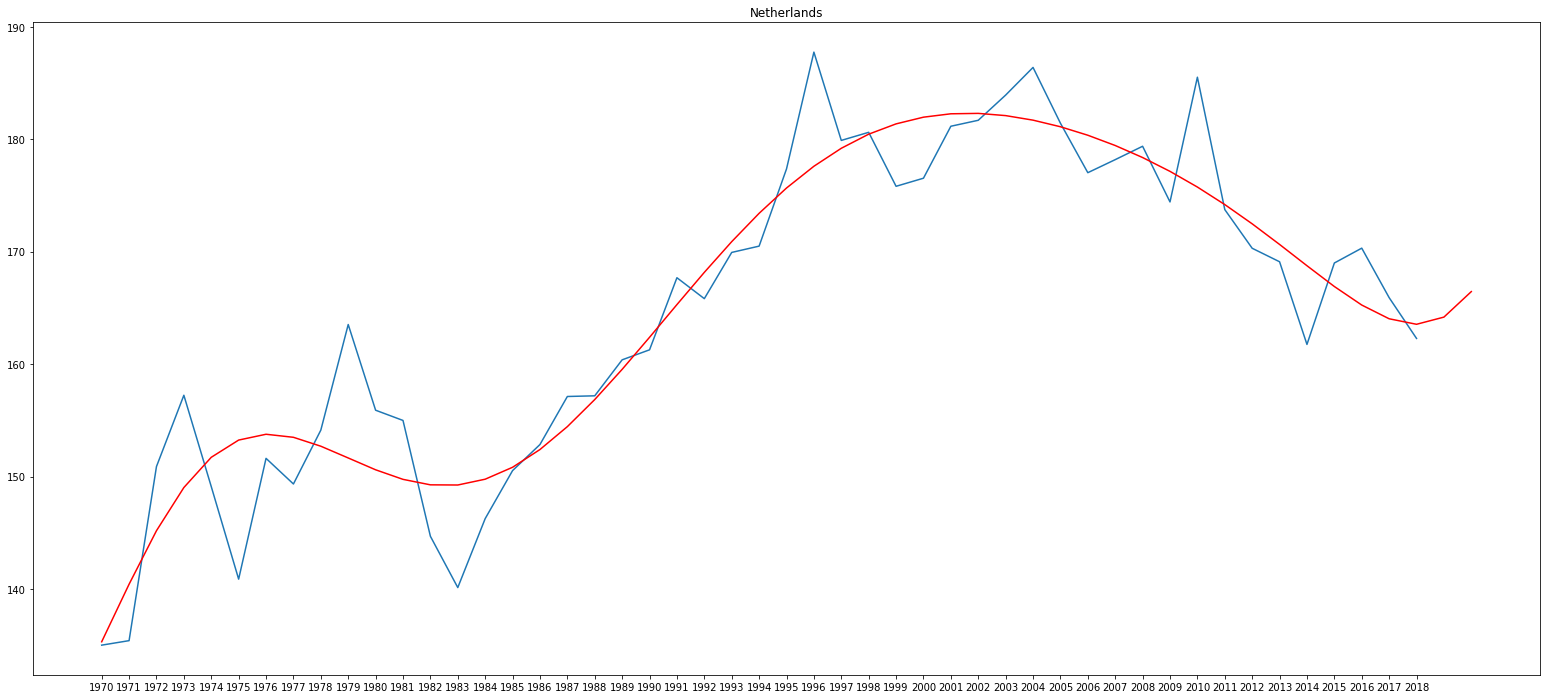

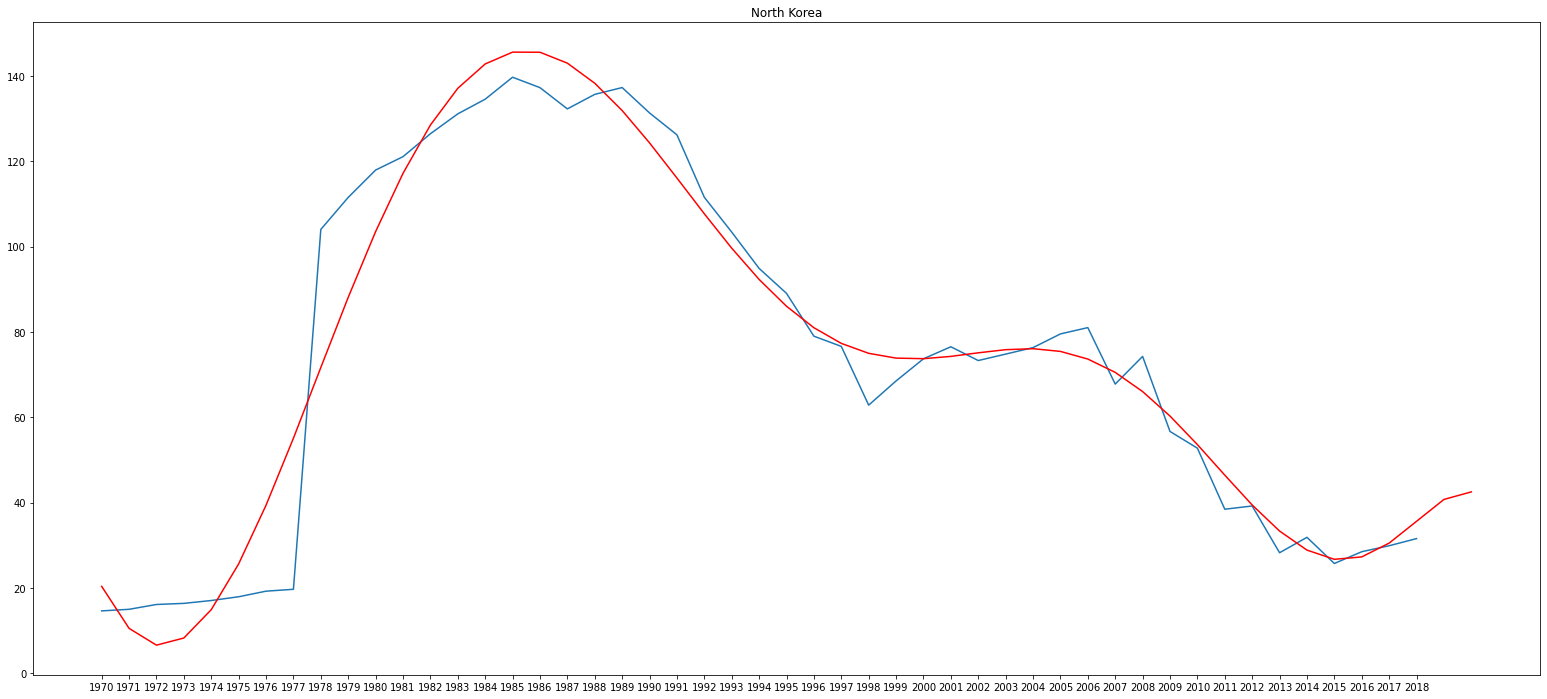

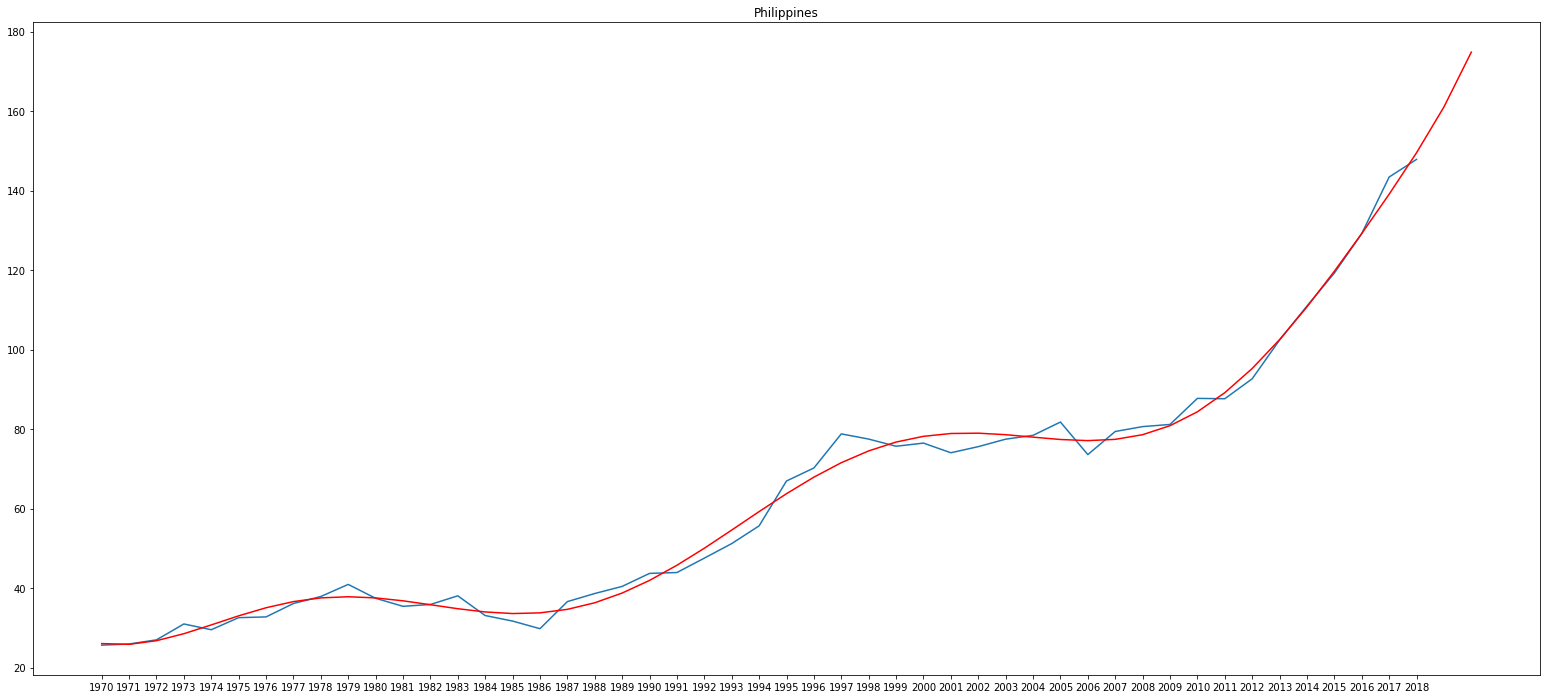

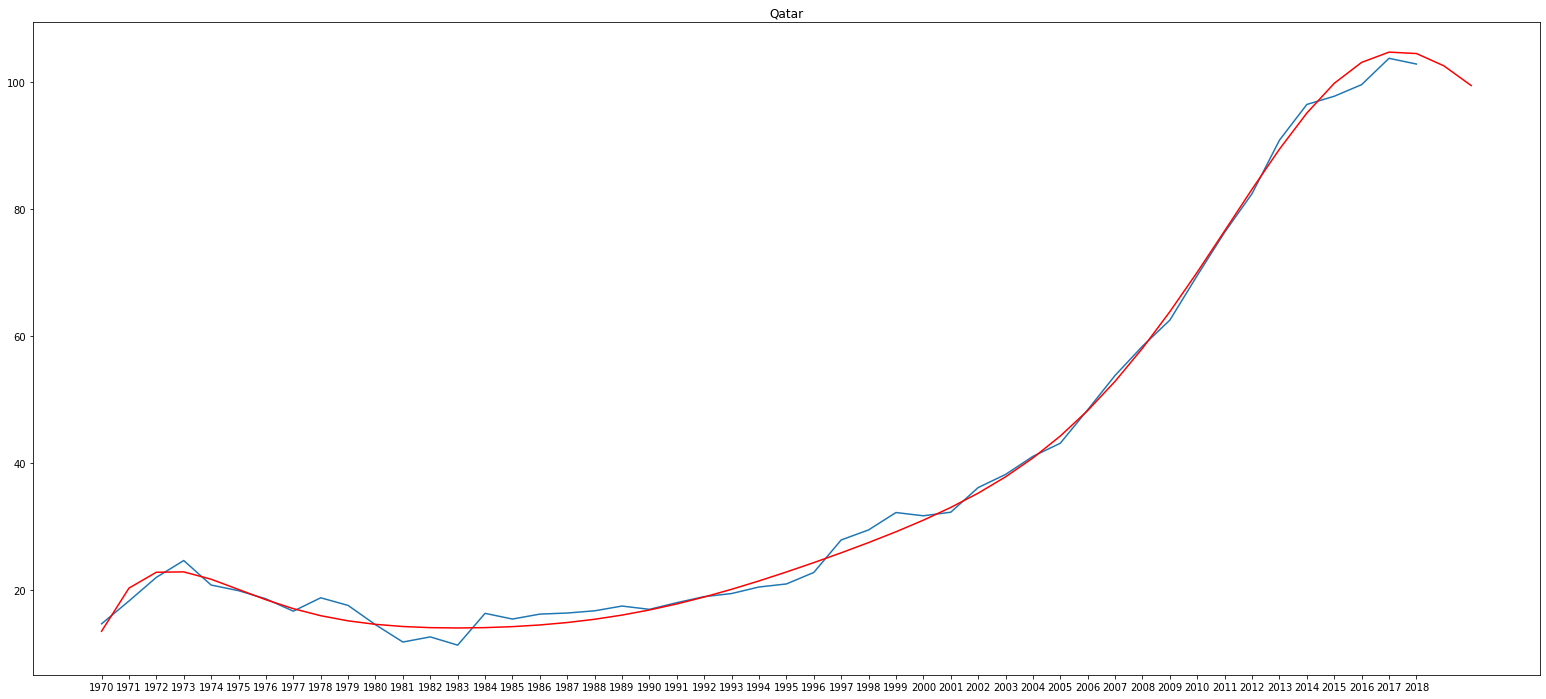

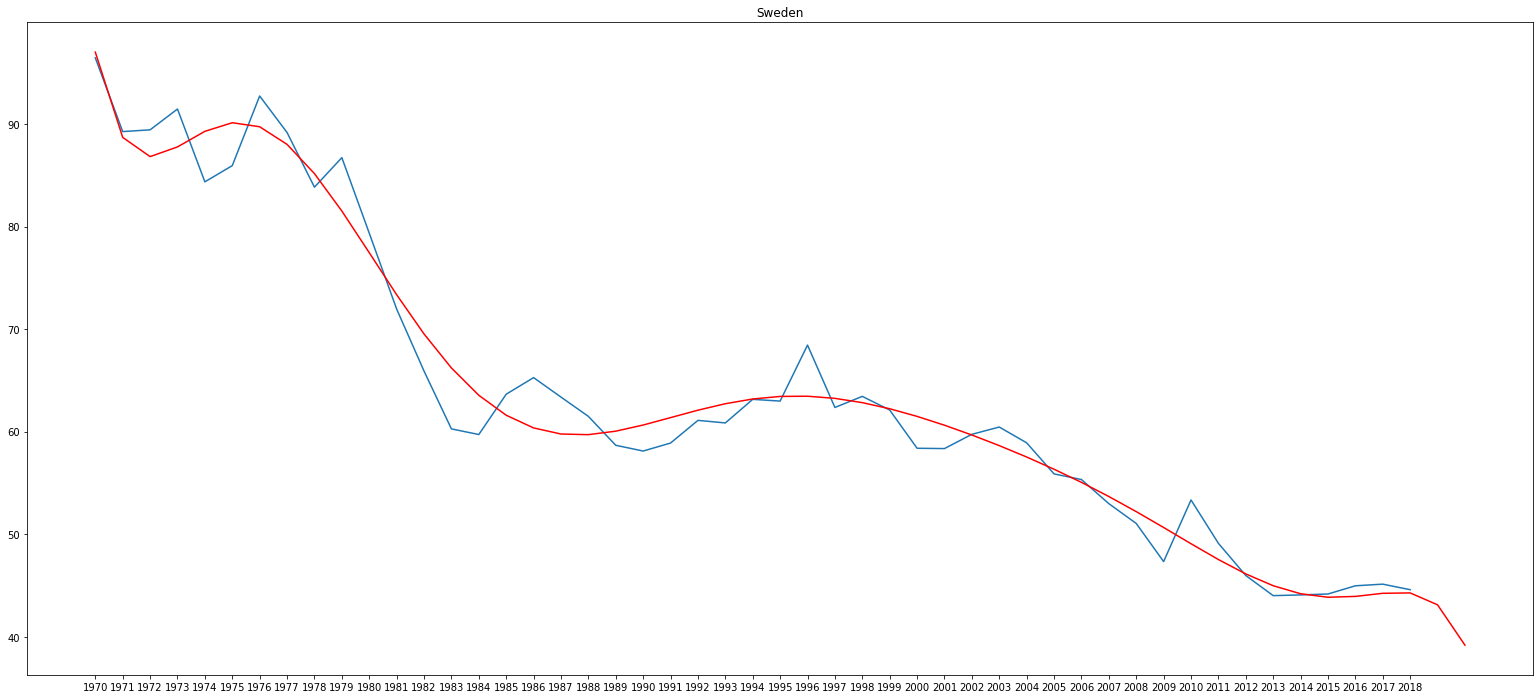

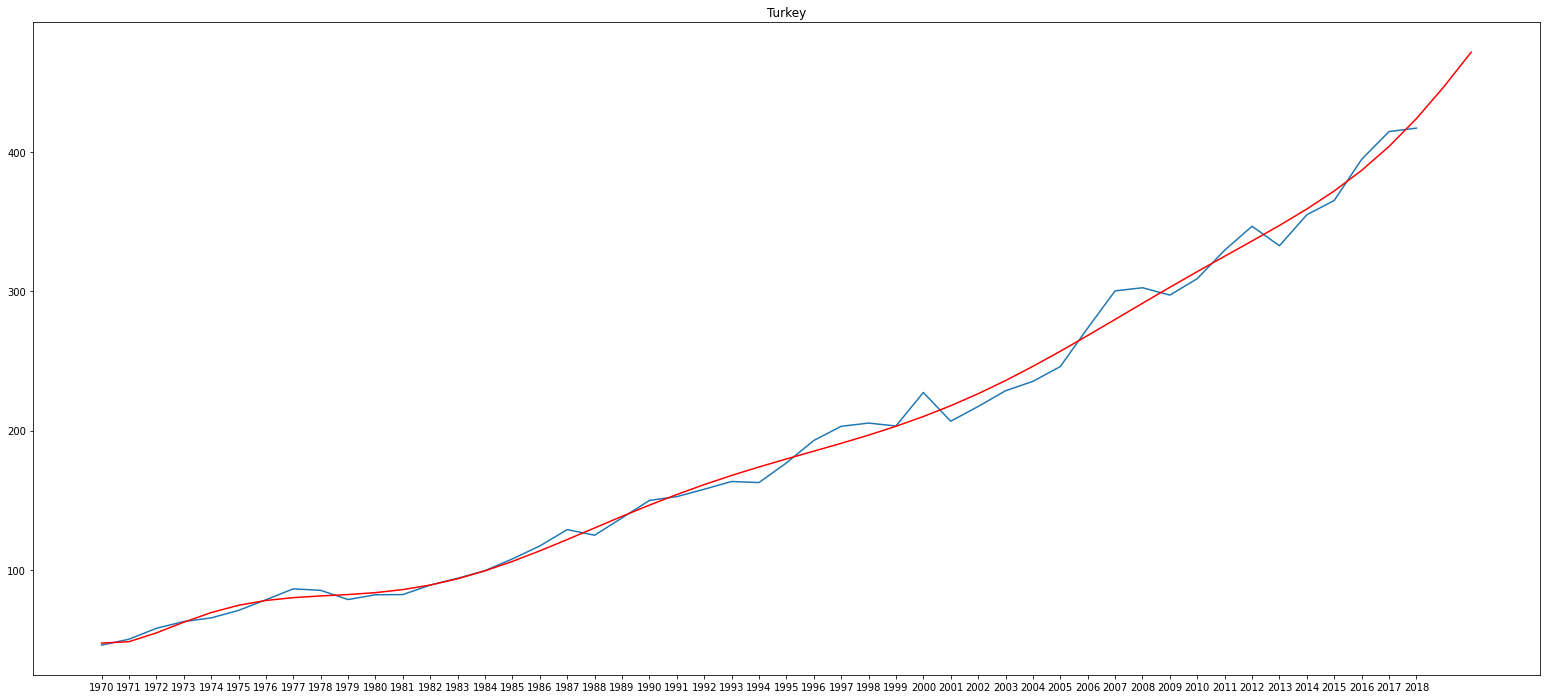

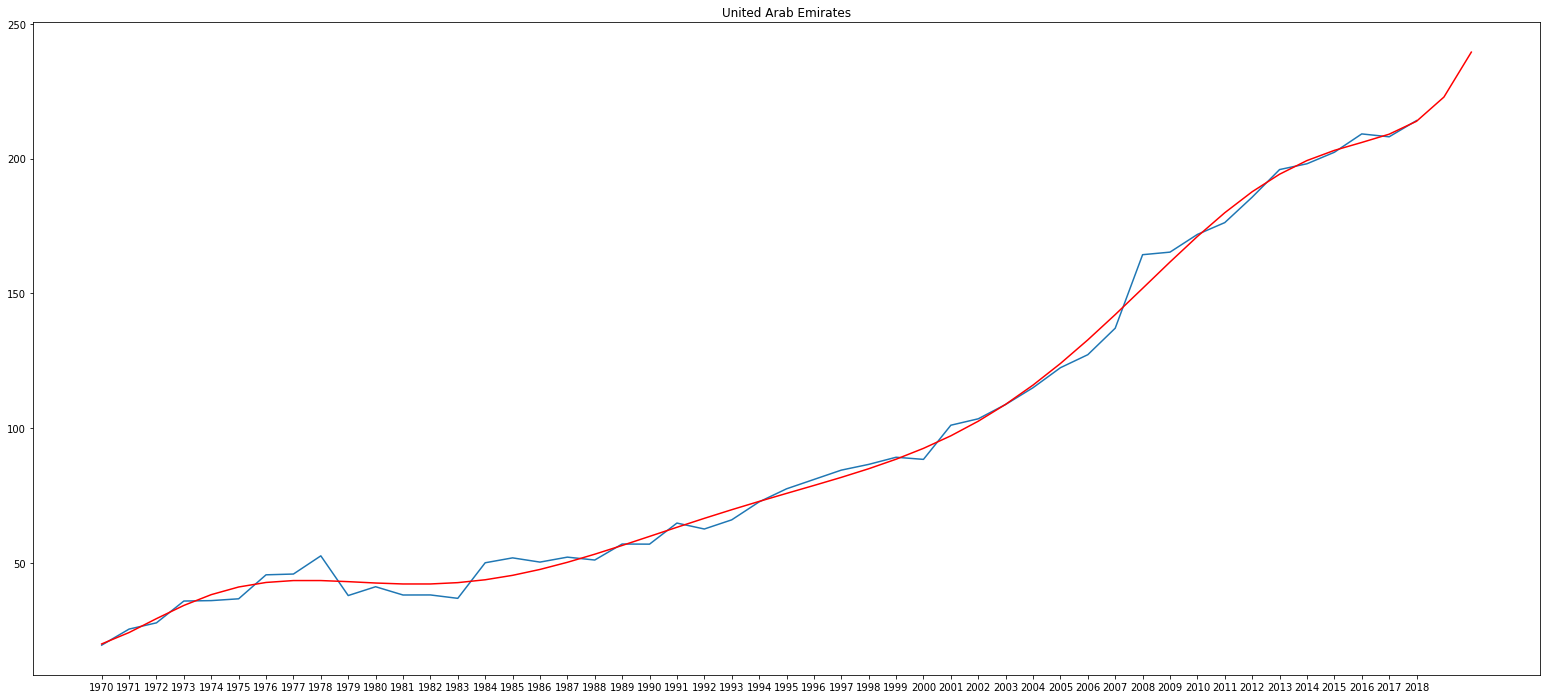

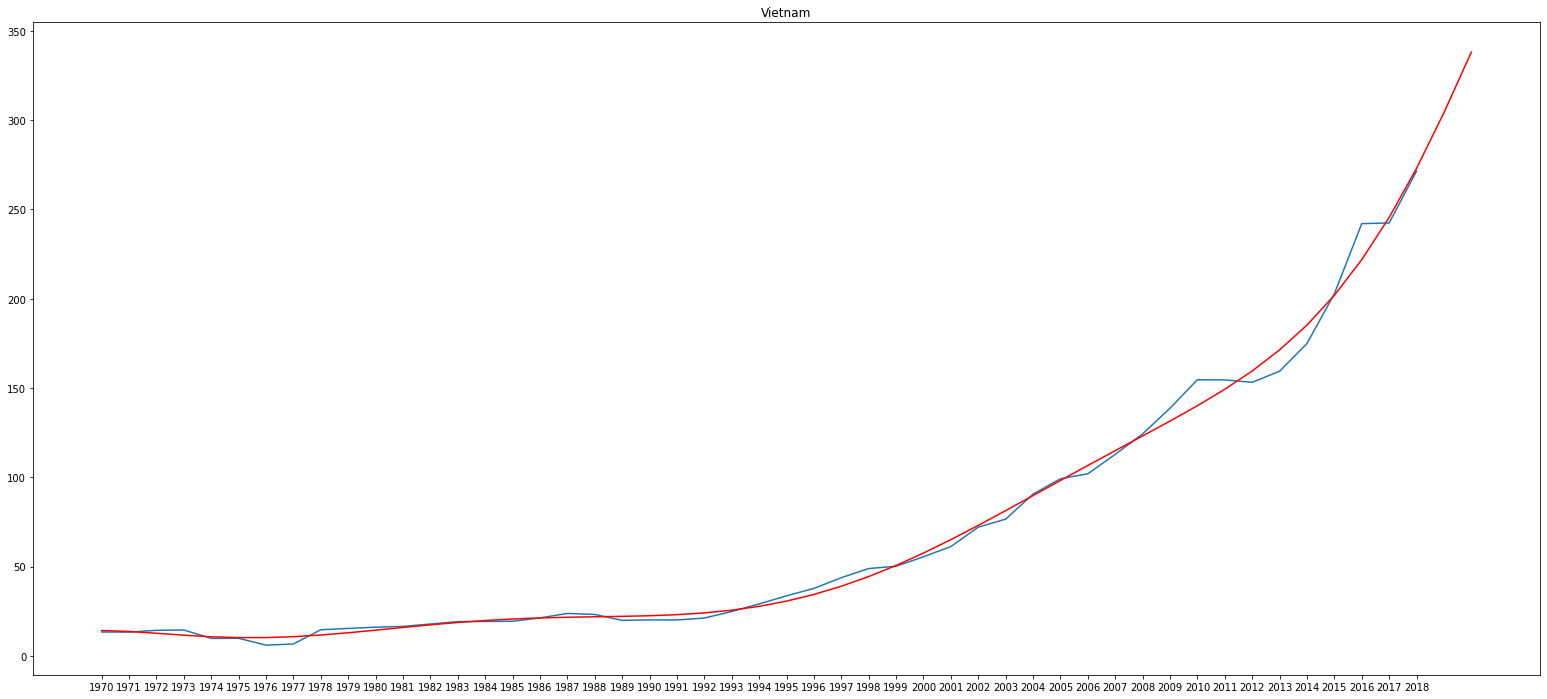

In [3]:
best_predictions =['Australia', 'Bangladesch', 'Burkina Faso', 'Central Africa Republic', 'Egypt', 'Finland', 'Iceland', 'India', 'Indonesia', 'Malaysia',
                   'Mauritus', 'Morocco', 'Philippines', 'Qatar', 'Sweden', 'Turkey', 'United Arab Emirates', 'Vietnam', 'Greece', 'North Korea', 'Netherlands']
for i in range (np.size(df_CO2['country_name'])-3): # delete 3 last lines from the array to limit the plots
    if data_co2[i].iloc[0][0] in best_predictions:
        y = (data_co2[i].iloc[0][1:].str.replace(',', '.', regex=True).astype(float)) # strings to floats
        name = (data_co2[i].iloc[0][0])
        predicted = predict(y,9)
        error = distortion(y, predicted)
        y_predicted[i] = np.append(np.append(name, predicted), error)
        if (error < 100):
            fig = plt.figure(figsize=(27, 12))
            plt.plot(y)
            plt.plot(predicted, color='red')
            plt.title(data_co2[i].iloc[0][0])

In [4]:
import seaborn as sns
from scipy.stats import pearsonr

df = pd.read_csv(path+'/greenhouse/co2_country_edgar.csv')
co2_country = df
for i in range (np.shape(co2_country)[0]):
    co2_country.iloc[i][2:] = (co2_country.iloc[i][2:].str.replace(',', '.', regex=True).astype(float))

list =[[],[]]
to_predict = {}
for i in range (np.size(co2_country['country_name'])):
    if i != 210:
        if data_co2[i].iloc[0][0] in best_predictions:
            y = (co2_country.iloc[i][2:])
            for ii in range (i, np.size(co2_country['country_name'])):
                if ii != 210:
                    if (i != ii):
                        yy = (co2_country.iloc[ii][2:])
                        list[0].append(co2_country.iloc[i][0]+' '+co2_country.iloc[ii][0])
                        cov = np.cov([y.astype(float),yy.astype(float)])[0][1]
                        corr = pearsonr(y.astype(float),yy.astype(float))[0] # pearson correlation used to find linear relations, spearman's correlation can be used to find non-linear relations
                        list[1].append(cov)
                        if (abs(corr) > 0.9):
                            print(co2_country.iloc[i][0]+' '+co2_country.iloc[ii][0]+' '+str(corr))
                            plt.figure(figsize=(27, 12))
                            p = sns.jointplot(y, yy);
                            p.set_axis_labels(co2_country.iloc[i][0], co2_country.iloc[ii][0], fontsize=16)
                            plt.title(corr)
                            #collect the list of countrys to predict
                            if ((co2_country.iloc[ii][0] in best_predictions) == False):
                                if co2_country.iloc[ii][0] in to_predict.keys():
                                    to_predict[co2_country.iloc[ii][0]] = to_predict[co2_country.iloc[ii][0]] + [co2_country.iloc[i][0]]
                                else:
                                    to_predict[co2_country.iloc[ii][0]] = [co2_country.iloc[i][0]]

Australia Bahrain 0.9522735693840318
Australia Barbados 0.9120604859089781
Australia Botswana 0.915680727651289
Australia Brazil 0.9521456547980651
Australia Cameroon 0.9345806980024027
Australia Canada 0.9765991321185745
Australia Central African Republic 0.9341266405420854
Australia Chile 0.910624296764081
Australia Colombia 0.9029624954367206
Australia Costa Rica 0.9670528351681155
Australia Cyprus 0.9675615923554937


/Users/ziedbk/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/ziedbk/Library/Python/3.7/lib/python/site-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


Australia Czechia -0.9266122344696511
Australia Dominica 0.9072201529441226
Australia Dominican Republic 0.970989155333172
Australia Ecuador 0.9321323267216568
Australia Egypt 0.9620203633649902
Australia El Salvador 0.9703201147304915
Australia Equatorial Guinea 0.9446691815416073
Australia Germany -0.963818960538694
Australia Gibraltar 0.943598503652022
Australia Guatemala 0.9007019851855049
Australia Guinea-Bissau 0.9510278666117203
Australia Honduras 0.9516385056449987
Australia Hong Kong 0.9356890638227935
Australia Indonesia 0.9727128047978074
Australia Iran 0.9477860183033082
Australia Israel and Palestine, State of 0.9895862693169585
Australia Japan 0.90319313207981
Australia Jordan 0.9711925473328745
Australia Lebanon 0.9107851495338235
Australia Libya 0.9484639640085681
Australia Malawi 0.931517238197505
Australia Malaysia 0.9637686201304272
Australia Mauritius 0.9663251599660696
Australia Mexico 0.9868791442779101
Australia Morocco 0.9511349318976711
Australia New Zealand 0.

KeyboardInterrupt: 

<Figure size 1944x864 with 0 Axes>

Error in callback <function flush_figures at 0x120349f28> (for post_execute):


KeyboardInterrupt: 

In [ ]:
for country in to_predict:
    print(country)
    print(to_predict[country])

In [ ]:
for country in to_predict:
    result = np.zeros((20,51))
    data = df_CO2.loc[df_CO2['country_name'] == country]
    y = (data.iloc[0][1:].str.replace(',', '.', regex=True).astype(float))
    maxvalue = np.zeros((51))
    minvalue = np.zeros((51))
    mean = np.zeros((51))
    fig = plt.figure(figsize=(27, 12))
    for ii in range(len(to_predict[country])):
        data = df_CO2.loc[df_CO2['country_name'] == to_predict[country][ii]]
        yy = (data.iloc[0][1:].str.replace(',', '.', regex=True).astype(float))
        yy_predicted = predict(yy,9)
        result[ii] = predict_from_country(yy_predicted, np.array(y), np.array(yy), 1)
    for i in range (51):
        #print(result[:ii+1,i])
        maxvalue[i] = np.max(result[:ii+1,i])
        minvalue[i] = np.min(result[:ii+1,i])
        mean[i] = np.mean(result[:ii+1,i])
    plt.fill_between(np.linspace(0, 50, num=51), minvalue, maxvalue, color='red', alpha= 0.4)
    plt.plot(y)
    plt.plot(mean, color='red')
    #plt.plot(maxvalue, color='red')
    plt.title(country)
    plt.legend(['real values', 'predicted value'],fontsize=24)